# Exceso mortalildad
Los datos fueron obtenidos de la página: 

http://www.dgis.salud.gob.mx/descargas/datosabiertos/excesoMortalidad/Exceso_Mortalidad_MX_2020_Historico.zip?v=2022.11.04

la base de datos tiene varios comprimidos, usamos el que dice Exceso_Mortalidad_MX_2020_quincena001_SE41 y la tabla que contiene dentro

Creamos la tabla en MySQL cambiando el nombre de las columnas por las siguientes:
1. FECHA_ACTUALIZACION: fecha_actualizacion
2. ID_REGISTRO: id_registro (primary key)
3. ENTIDAD_REG: estado
4. MUNICIPIO_REG: municipio
5. FECHA_DEFUNCION: fecha_defuncion
6. SEXO: sexo
7. EDAD: edad

In [3]:
#Las librerias que usamos en este proyecto son las siguientes:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

### Función que ayuda a conectarnos a la base de datos cuando agamos una consulta

In [4]:
def connect_to_db():
    return mysql.connector.connect(
        host="localhost",
        user="root",
        password='Alanjosue275$',
        database="excesomortalidad"
    )

### Funcion que nos ayuda a realizar una consulta y devolvernos los datos en un DataFrame de pandas

In [5]:
def fetch_data(query):
    connection = connect_to_db()
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [col[0] for col in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    cursor.close()
    connection.close()
    return df

### Realizamos algunos consultas y graficamos
Por ejemplo ver el porcentaje de defunciones de hombres contra mujeres en una grafica de pie

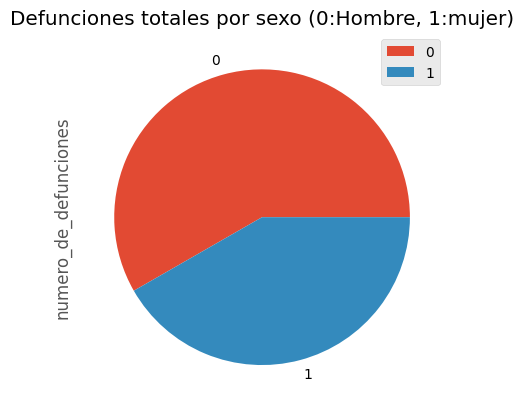

In [4]:
query = """
SELECT 
    CASE 
        WHEN sexo = 1 THEN "femenino" 
        WHEN sexo = 2 THEN "masculino" 
        END AS genero, COUNT(*) AS numero_de_defunciones 
    FROM mortalidadmx GROUP BY genero;
"""
data_df = fetch_data(query)
data_df
def plot_data(df):
    with plt.style.context(('ggplot')):
        df.plot(kind='pie', x='genero', y='numero_de_defunciones')
        plt.title('Defunciones totales por sexo (0:Hombre, 1:mujer)')
        plt.show()
plot_data(data_df)

Tambien podemos ver el número de defunciones por estado.

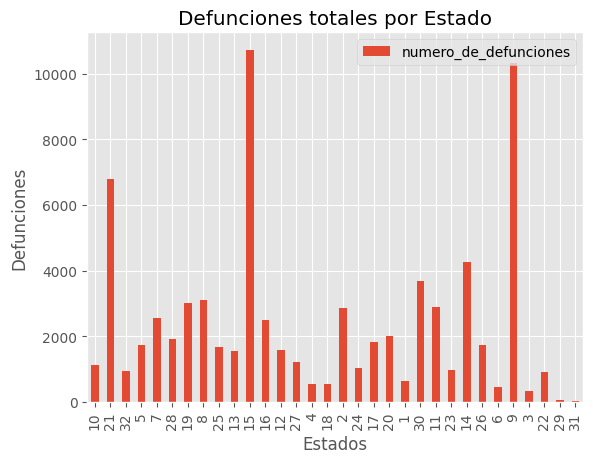

In [5]:
query = 'SELECT estado, COUNT(*) AS numero_de_defunciones FROM mortalidadmx GROUP BY estado;'
data_df = fetch_data(query)
def plot_data(df):
    with plt.style.context(('ggplot')):
        df.plot(kind='bar', x='estado', y='numero_de_defunciones')
        plt.xlabel('Estados')
        plt.ylabel('Defunciones')
        plt.title('Defunciones totales por Estado')
        plt.show()
plot_data(data_df)

Esto nos sugiere que los estados con mayor número de defunciones son el 15 y el 9, estado de mexico y ciudad de méxico respectivamente de acuerdo con: https://www.agricultura.gob.mx/sites/default/files/sagarpa/document/2018/07/17/8/180717115914/entidades-federativas.pdf

### Podemos ver estos datos en forma de tabla

In [24]:
def print_table(df):
    print(tabulate(df, headers='keys', tablefmt='psql'))

In [7]:
query = 'SELECT estado, COUNT(*) AS numero_de_defunciones FROM mortalidadmx GROUP BY estado;'
data_df = fetch_data(query)
print_table(data_df)

+----+----------+-------------------------+
|    |   estado |   numero_de_defunciones |
|----+----------+-------------------------|
|  0 |       10 |                    1127 |
|  1 |       21 |                    6792 |
|  2 |       32 |                     937 |
|  3 |        5 |                    1730 |
|  4 |        7 |                    2571 |
|  5 |       28 |                    1917 |
|  6 |       19 |                    3000 |
|  7 |        8 |                    3119 |
|  8 |       25 |                    1669 |
|  9 |       13 |                    1559 |
| 10 |       15 |                   10720 |
| 11 |       16 |                    2491 |
| 12 |       12 |                    1569 |
| 13 |       27 |                    1212 |
| 14 |        4 |                     555 |
| 15 |       18 |                     534 |
| 16 |        2 |                    2854 |
| 17 |       24 |                    1025 |
| 18 |       17 |                    1815 |
| 19 |       20 |               

### Veamos la edad máxima y mínima de defuncion registrada para cada sexo

In [8]:
query = 'SELECT MIN(edad) as min_edad, MAX(edad) AS max_edad FROM mortalidadmx GROUP BY sexo;'
data_df = fetch_data(query)
print_table(data_df)

+----+------------+------------+
|    |   min_edad |   max_edad |
|----+------------+------------|
|  0 |          0 |        104 |
|  1 |          0 |        109 |
+----+------------+------------+


### Agamos lo mismo para la edad mínima y máxima de defunción para cada estado

In [9]:
query = 'SELECT MIN(edad) as min_edad, MAX(edad) AS max_edad FROM mortalidadmx GROUP BY estado;'
data_df = fetch_data(query)
print_table(data_df)

+----+------------+------------+
|    |   min_edad |   max_edad |
|----+------------+------------|
|  0 |          0 |         99 |
|  1 |          0 |         99 |
|  2 |          0 |         99 |
|  3 |          0 |         99 |
|  4 |          0 |         99 |
|  5 |          0 |         99 |
|  6 |          0 |         99 |
|  7 |          0 |         99 |
|  8 |          0 |         99 |
|  9 |          0 |         99 |
| 10 |          0 |         99 |
| 11 |          0 |         99 |
| 12 |          0 |         99 |
| 13 |          0 |        104 |
| 14 |          0 |         99 |
| 15 |          0 |         99 |
| 16 |          0 |         99 |
| 17 |          0 |         99 |
| 18 |          0 |         99 |
| 19 |          0 |         99 |
| 20 |          0 |         99 |
| 21 |          0 |         99 |
| 22 |          0 |         99 |
| 23 |          0 |         99 |
| 24 |          0 |         99 |
| 25 |          0 |         99 |
| 26 |          0 |         99 |
| 27 |    

Es curioso que el estado 30 (Yucatán) la edad minima sea 21, lo mas seguro es que nuestra base de datos este incompleta

### Con esto podemos tener una idea de la edad promedio de defunción. Vamos a calcularla

In [47]:
query = 'SELECT AVG(edad) AS promedio_edad FROM mortalidadmx;'
data_df = fetch_data(query)
print_table(data_df)

+----+-----------------+
|    |   promedio_edad |
|----+-----------------|
|  0 |          63.819 |
+----+-----------------+


### Veamos que tanto se alejan las edades promedio con un diagrama de caja

In [52]:
query = 'SELECT edad FROM mortalidadmx;'
data_df = fetch_data(query)
ax = data_df.edad.plot.box()

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (1).

### Finalmente hagamos un histograma de la distribucion de las edades para ver a que edad es mas probable tener una nueva defunción

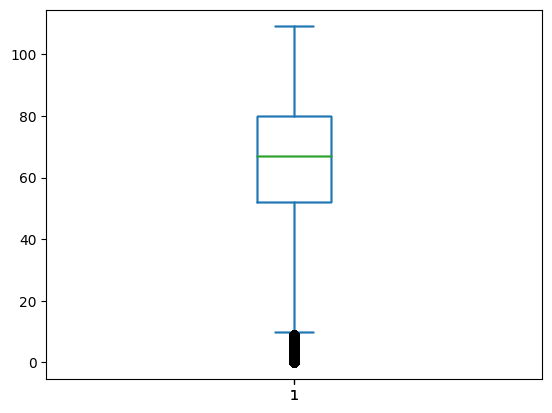

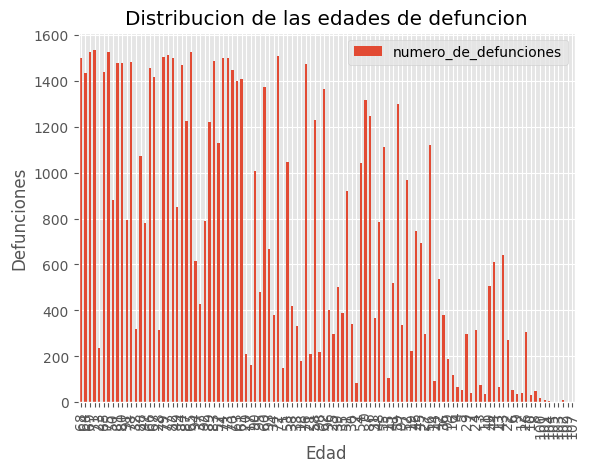

In [49]:
query = 'SELECT edad, COUNT(*) AS numero_de_defunciones FROM mortalidadmx GROUP BY edad;'
data_df = fetch_data(query)
def plot_data(df):
    with plt.style.context(('ggplot')):
        df.plot(kind='bar', x='edad', y='numero_de_defunciones')
        plt.xlabel('Edad')
        plt.ylabel('Defunciones')
        plt.title('Distribucion de las edades de defuncion')
        plt.show()
plot_data(data_df)

Esto nos podria sugerir a ojo que es mas probable tener una nueva defunción para edades menores a 80 aproximadamente y que es poca gente la que vive más de esa edad. Además de que parece tener un comportamiento uniforme entre 0 y 40 aproximadamente.

In [31]:
query = 'SELECT MAX(edad) AS numero_de_defunciones FROM mortalidadmx GROUP BY edad;'
data_df = fetch_data(query)
print_table(data_df)

+-----+--------+-------------------------+
|     |   edad |   numero_de_defunciones |
|-----+--------+-------------------------|
|   0 |     68 |                    1501 |
|   1 |     64 |                    1432 |
|   2 |     69 |                    1526 |
|   3 |     71 |                    1533 |
|   4 |     23 |                     238 |
|   5 |     85 |                    1438 |
|   6 |     75 |                    1526 |
|   7 |     50 |                     879 |
|   8 |     81 |                    1478 |
|   9 |     80 |                    1477 |
|  10 |     91 |                     795 |
|  11 |     78 |                    1482 |
|  12 |     32 |                     318 |
|  13 |     88 |                    1074 |
|  14 |     47 |                     782 |
|  15 |     66 |                    1456 |
|  16 |     67 |                    1417 |
|  17 |     28 |                     313 |
|  18 |     79 |                    1502 |
|  19 |     77 |                    1511 |
|  20 |    